# Splitting scheme for a two-typed crowd motion under congestion


The implementation we provide is a splitting scheme, adapted from the one described in https://arxiv.org/pdf/1101.4102v1.pdf.

Being given the two densities $\rho_1^t,\rho_2^t$ and a timestep $\tau$,we obtain $\rho_1^{t+\tau},\rho_2^{t+\tau}$ by the following process.

**Step 1: transport**

We transport separately the two densities by the two desired velocity fields :
\begin{equation}
\mu_j^t = (Id+\tau U_j)_\# \rho_j^t.
\end{equation}

**Step 2: projection**

We then project the pair $(\mu_1^t,\mu_2^t)$ on $K_2 = \{\nu_1,\nu_2 \in W_2(\Omega),\, \nu_1+\nu_2\leq 1\}$.
We decompose this projection into 3 steps:


1.   A stochastic projection of $\mu_1^t + \mu_2^t$ onto  $K_1 = \{\nu \in W_2(\Omega),\, \nu\leq 1\}$,
2.   A computation with the Sinkhorn algorith of the transport plan $T$ from $\mu_1^t + \mu_2^t$ onto its projection,
3.   The projection of $(\mu_1^t,\mu_2^t)$ on $K_2$ is given by $T_\#\mu_1^t, T_\#\mu_2^t$.




In [2]:
import shutil
import os
import sys



from Splitting_f import Splitting
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import Image


In [4]:
N = 100             # Meshsize
dt = .01           # Timestep
Ttot = .5         # Final time
Iterations = int(Ttot / dt)

## Method parameters

epsilon = .0001             # Sinkhorn's regularisation coefficient
niter = 10                  # Maximal number of iterations in Sinkhorn
key_proj = 'stoch'          # Choice of K2 projection : 'stoch' for the stochastic projection (recommanded)
                            # 'sand' for the sandpile projection
key_pshfwd = 'lagrangian'   # Choice of the pushforward scheme : 'lagrangian' for the Lagrangian transport
                            # 'volfin' for the finite volume transport
Ntest = 50                  # Number of parallel runs of the stochastic projection

## Model parameters

chi = 0            # Chemoattraction parameter
alpha = 0.          # Inter-type chemoattraction coefficient parameter (for equal attraction regardless of the type: 1)
xi = 0.             # External potential parameter
eta= .0             # Interaction parameter
beta = 0.            # Inter-type interaction parameter  (for equal interaction regardless of the type: 1)
zeta= 1.            # External velocity field parameter
rPot= 0.04          # Radius of interaction (the space is [0,1]*[0,1])


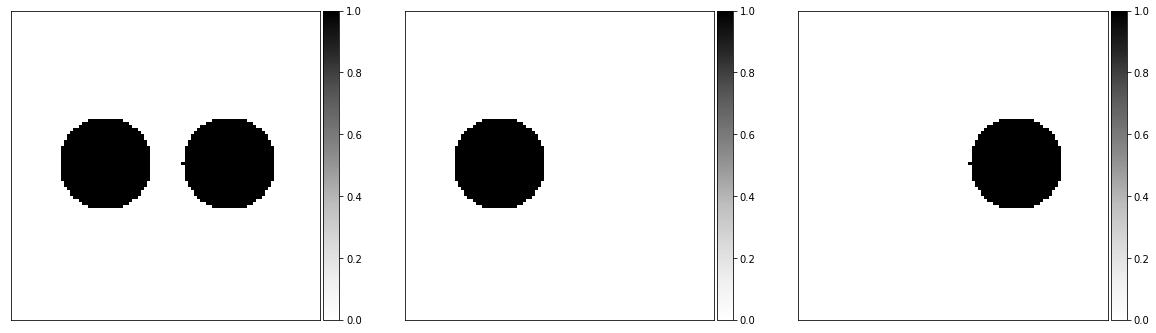

In [5]:
# -------------------- INITIAL DENSITIES AND FIELDS ---------------------------

rho_1 = np.zeros((N,N))
rho_2 = np.zeros((N,N))

rad = .15

for i in range(N):
  for j in range(N):
    if (i/N-0.3)**2 + (j/N-.5)**2 < rad **2:
      rho_1[i,j] +=1
    if (i/N-0.7)**2 + (j/N-.5)**2 < rad **2:
      rho_2[i,j] +=1


## External field

def u_1(x, y):
    return 1,0

def u_2(x, y):
    return -1,0

## Constant potential

"Cells are subject to -\grad(pot)"

def pot_1(x, y):
    return 2*((y-1/2)**2+(x-1/2)**2)

def pot_2(x, y):
    return 2*((y-1/2)**2+(x-1/2)**2)

## Interaction potential

"rPot is the maximal interaction range"
"interaction term of the form \grad(V*rho)"

def kernel(u,rPot):
    if u <= rPot:
        return rPot**2*35/32*((1-u**2/rPot**2)**3)
    else:
        return 0

stock = [rho_1+rho_2,rho_1, rho_2]

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 3, 1)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
im1 = ax1.imshow(stock[0].T, vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(1, 3, 2)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
im2 = ax2.imshow(stock[1].T, vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(1, 3, 3)

ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
im3 = ax3.imshow(stock[2].T,vmin=0,vmax=1, interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')








The desired velocities are there

\begin{equation}
\zeta u_i - \xi \nabla \mathrm{pot}_i +\chi \nabla (c_i + \alpha c_{2-i}) + \eta \nabla (V\ast (\rho_i+\beta \rho_{2-i}))
\end{equation}
where $c_i$ satisfies a Keller Segel equation with instantaneous diffusion 
\begin{equation}-\nabla c_i = \rho_i
\end{equation}
and $V(x,y) = \mathrm{kernel}(\lVert x-y\rVert)$.

We start with an external vector field only.

There are precomputed videos available

/content/macroscopic-cell-motion/img_vid/Crossing_Spheres.avi

/content/macroscopic-cell-motion/img_vid/Crossing_Spheres_Attraction.avi

/content/macroscopic-cell-motion/img_vid/Crossing_Spheres_Chemo.avi


We start with the only effect of a constant desired velocity ($\zeta = 1, \xi = \chi=\eta = 0$).



Iteration  0  sur  50  Temps : 3.838539123535156e-05 secondes ---
Iteration  1  sur  50  Temps : 3.407282829284668 secondes ---
Iteration  2  sur  50  Temps : 4.148375988006592 secondes ---
Iteration  3  sur  50  Temps : 4.915022850036621 secondes ---
Iteration  4  sur  50  Temps : 5.648837566375732 secondes ---
Iteration  5  sur  50  Temps : 6.4498724937438965 secondes ---
Iteration  6  sur  50  Temps : 9.099851369857788 secondes ---
Iteration  7  sur  50  Temps : 13.827667474746704 secondes ---
Iteration  8  sur  50  Temps : 20.65718936920166 secondes ---
Iteration  9  sur  50  Temps : 29.225409269332886 secondes ---
Iteration  10  sur  50  Temps : 39.576839208602905 secondes ---
Iteration  11  sur  50  Temps : 50.886998891830444 secondes ---
Iteration  12  sur  50  Temps : 64.16917896270752 secondes ---
Iteration  13  sur  50  Temps : 78.25726056098938 secondes ---
Iteration  14  sur  50  Temps : 93.33254170417786 secondes ---
Iteration  15  sur  50  Temps : 108.85761570930481 secon

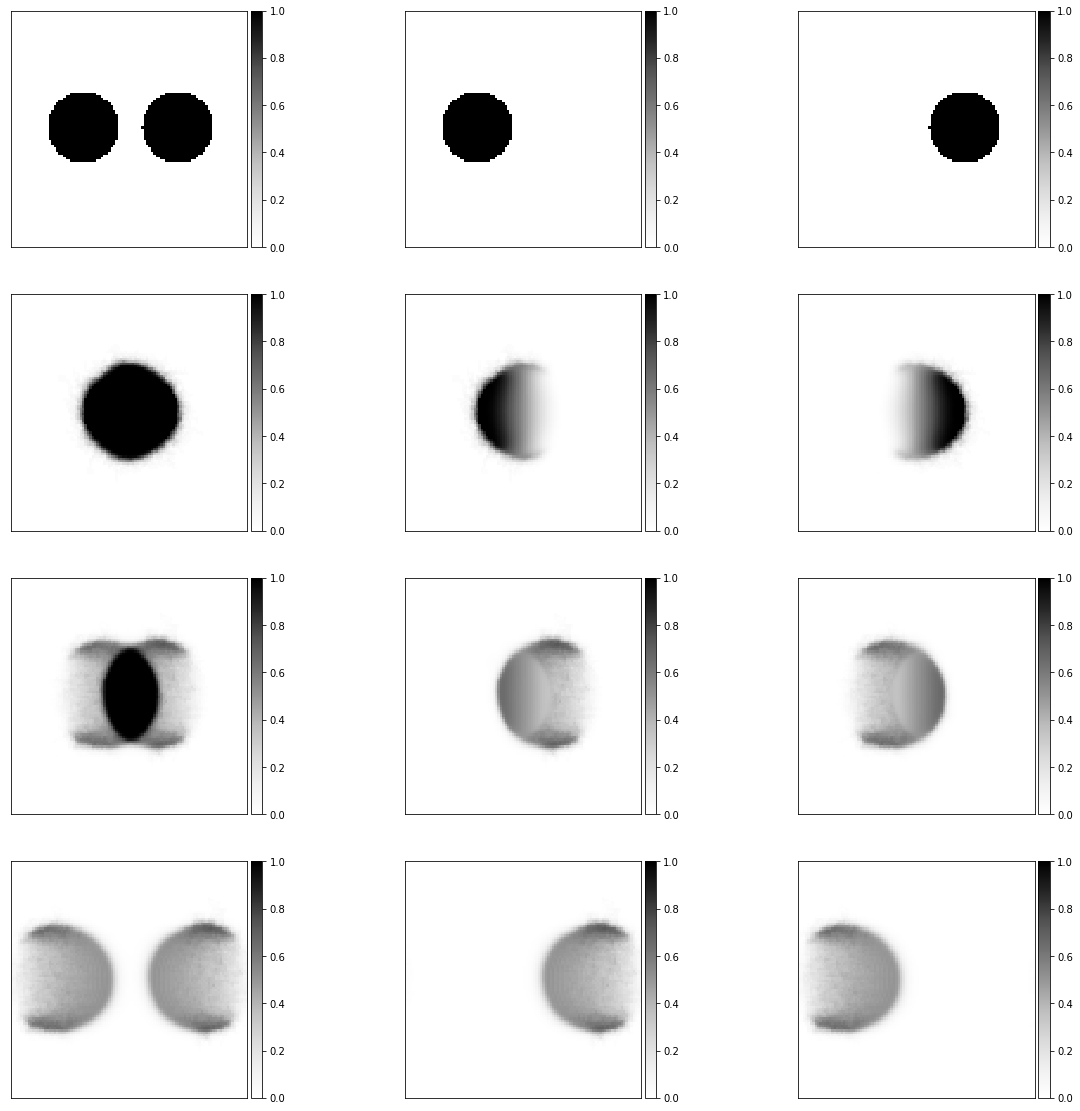

In [8]:
# Running the model

# Only external field
densities = Splitting(rho_1,rho_2,N, dt, Iterations, u_1, u_2,store_results = True, zeta=zeta)

fig = plt.figure(figsize=(20,20))

# Display

stock = densities[0]

ax1 = fig.add_subplot(4, 3, 1)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
im1 = ax1.imshow(stock[0], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(4, 3, 2)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
im2 = ax2.imshow(stock[1], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(4, 3, 3)

ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
im3 = ax3.imshow(stock[2],vmin=0,vmax=1, interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')


stock = densities[15]

ax1 = fig.add_subplot(4, 3, 4)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
im1 = ax1.imshow(stock[0], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(4, 3, 5)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
im2 = ax2.imshow(stock[1], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(4, 3, 6)

ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
im3 = ax3.imshow(stock[2],vmin=0,vmax=1, interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')


stock = densities[30]

ax1 = fig.add_subplot(4, 3, 7)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
im1 = ax1.imshow(stock[0], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(4, 3, 8)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
im2 = ax2.imshow(stock[1], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(4, 3, 9)

ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
im3 = ax3.imshow(stock[2],vmin=0,vmax=1, interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')

stock = densities[50]

ax1 = fig.add_subplot(4, 3, 10)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
im1 = ax1.imshow(stock[0], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(4, 3, 11)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
im2 = ax2.imshow(stock[1], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(4, 3, 12)

ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
im3 = ax3.imshow(stock[2],vmin=0,vmax=1, interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')



We then add chemoattraction for particles of the same type ($\chi >0, \alpha = 0$).


Iteration  0  sur  50  Temps : 0.00012803077697753906 secondes ---
Iteration  1  sur  50  Temps : 12.114291191101074 secondes ---
Iteration  2  sur  50  Temps : 24.240187644958496 secondes ---
Iteration  3  sur  50  Temps : 36.39219832420349 secondes ---
Iteration  4  sur  50  Temps : 48.65112924575806 secondes ---
Iteration  5  sur  50  Temps : 61.31558036804199 secondes ---
Iteration  6  sur  50  Temps : 73.38782477378845 secondes ---
Iteration  7  sur  50  Temps : 86.28864336013794 secondes ---
Iteration  8  sur  50  Temps : 101.41116261482239 secondes ---
Iteration  9  sur  50  Temps : 116.18551015853882 secondes ---
Iteration  10  sur  50  Temps : 130.71110224723816 secondes ---
Iteration  11  sur  50  Temps : 144.47540593147278 secondes ---
Iteration  12  sur  50  Temps : 158.98216605186462 secondes ---
Iteration  13  sur  50  Temps : 172.31388330459595 secondes ---
Iteration  14  sur  50  Temps : 185.76040530204773 secondes ---
Iteration  15  sur  50  Temps : 200.0342698097229 s

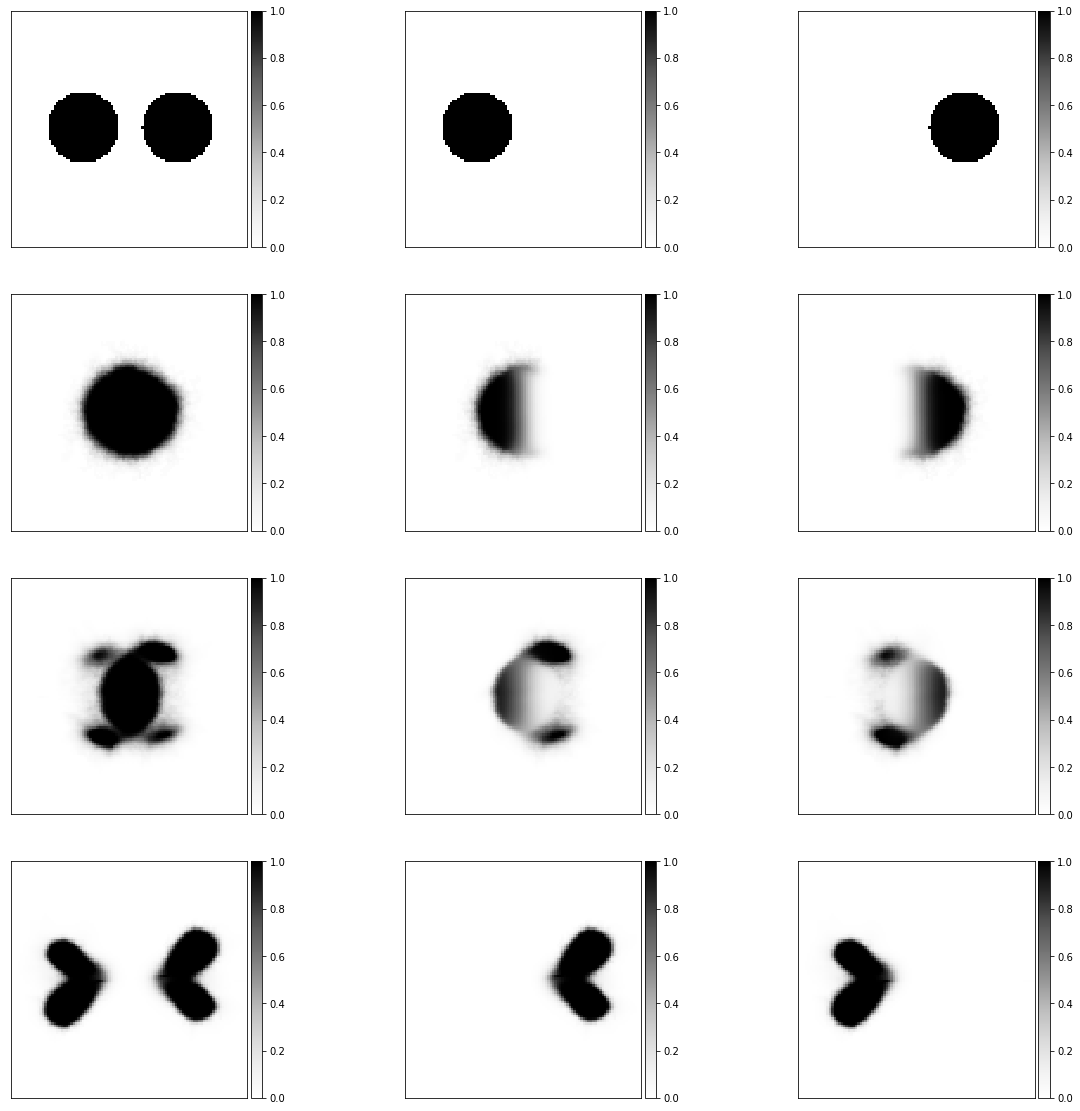

In [9]:
## Addingchemoattraction

chi = 10.

densities2 = Splitting(rho_1,rho_2,N, dt, Iterations, u_1, u_2,store_results = True, zeta=zeta, chi=chi, alpha=alpha)

fig = plt.figure(figsize=(20,20))


stock = densities2[0]

ax1 = fig.add_subplot(4, 3, 1)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
im1 = ax1.imshow(stock[0], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(4, 3, 2)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
im2 = ax2.imshow(stock[1], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(4, 3, 3)

ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
im3 = ax3.imshow(stock[2],vmin=0,vmax=1, interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')


stock = densities2[15]

ax1 = fig.add_subplot(4, 3, 4)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
im1 = ax1.imshow(stock[0], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(4, 3, 5)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
im2 = ax2.imshow(stock[1], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(4, 3, 6)

ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
im3 = ax3.imshow(stock[2],vmin=0,vmax=1, interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')


stock = densities2[30]

ax1 = fig.add_subplot(4, 3, 7)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
im1 = ax1.imshow(stock[0], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(4, 3, 8)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
im2 = ax2.imshow(stock[1], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(4, 3, 9)

ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
im3 = ax3.imshow(stock[2],vmin=0,vmax=1, interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')

stock = densities2[50]

ax1 = fig.add_subplot(4, 3, 10)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
im1 = ax1.imshow(stock[0], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(4, 3, 11)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
im2 = ax2.imshow(stock[1], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(4, 3, 12)

ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
im3 = ax3.imshow(stock[2],vmin=0,vmax=1, interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')



We now model aggregation for a structured initial position, under chemioattraction for the same type, chemorepulsion for the ether type, and short-range attraction for the same type ($\zeta = 0, \chi >0, \alpha <0, \eta >0, \beta = 0$).


In [11]:
N = 150             # Meshsize

chi = 8             # Chemoattraction parameter
alpha = -.2         # Inter-type chemoattraction coefficient parameter (for equal attraction regardless of the type: 1)
xi = 0.             # External potential parameter
eta= .1             # Interaction parameter
beta = 0            # Inter-type interaction parameter  (for equal interaction regardless of the type: 1)
zeta= 0.            # External velocity field parameter
rPot= 0.04          # Radius of interaction (the space is [0,1]*[0,1])
Ntest=100

rho_1 = np.zeros((N,N))
rho_2 = np.zeros((N,N))


r = 1 / 20              # Radius

for x in [1,2,3]:
    for i in range(N):
        for j in range(N):
            if (j/N - (x-2)/10-1/2) ** 2 + (i/N - (0+1.5) / 5) ** 2 < r ** 2:
                rho_1[i, j] += .5

for x in [1,3]:
    for i in range(N):
        for j in range(N):
            if (j/N - (x-2)/10-1/2) ** 2 + (i/N - (2) / 5) ** 2 < r ** 2:
                rho_1[i, j] += .5

for x in [1,2,3]:
    for i in range(N):
        for j in range(N):
            if (j/N - (x-2)/10-1/2) ** 2 + (i/N - (2+0.5) / 5) ** 2 < r ** 2:
                rho_1[i, j] += .5

for i in range(N):
    for j in range(N):
        if (j/N - (2+.5)/5) ** 2 + (i/N - (3) / 5) ** 2 < r ** 2:
            rho_1[i, j] += .5


for i in range(N):
    for j in range(N):
        if (j/N - (2+.5)/5) ** 2 + (i/N - (2) / 5) ** 2 < r ** 2:
            rho_2[i, j] += .5




for x in [1,2,3]:
    for i in range(N):
        for j in range(N):
            if (j/N - (x-2)/10-1/2) ** 2 + (i/N - (2+0.5) / 5) ** 2 < r ** 2:
                rho_2[i, j] += .5

for x in [1,3]:
    for i in range(N):
        for j in range(N):
            if (j/N - (x-2)/10-1/2) ** 2 + (i/N - (3) / 5) ** 2 < r ** 2:
                rho_2[i, j] += .5

for x in [1,2,3]:
    for i in range(N):
        for j in range(N):
            if (j/N - (x-2)/10-1/2) ** 2 + (i/N - (3.5) / 5) ** 2 < r ** 2:
                rho_2[i, j] += .5


densites3 = Splitting(rho_1,rho_2,N, dt, Iterations, u_1, u_2,store_results = True, zeta=zeta, pot_1=pot_1, pot_2=pot_2, xi=xi, chi=chi, alpha=alpha,
              eta=eta, beta=beta, kernel=kernel, rPot = rPot, key_pshfwd="lagrangian")

fig = plt.figure(figsize=(20,20))


stock = densites3[0]

ax1 = fig.add_subplot(4, 3, 1)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
im1 = ax1.imshow(stock[0], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(4, 3, 2)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
im2 = ax2.imshow(stock[1], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(4, 3, 3)

ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
im3 = ax3.imshow(stock[2],vmin=0,vmax=1, interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')


stock = densites3[15]

ax1 = fig.add_subplot(4, 3, 4)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
im1 = ax1.imshow(stock[0], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(4, 3, 5)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
im2 = ax2.imshow(stock[1], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(4, 3, 6)

ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
im3 = ax3.imshow(stock[2],vmin=0,vmax=1, interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')


stock = densites3[35]

ax1 = fig.add_subplot(4, 3, 7)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
im1 = ax1.imshow(stock[0], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(4, 3, 8)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
im2 = ax2.imshow(stock[1], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(4, 3, 9)

ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
im3 = ax3.imshow(stock[2],vmin=0,vmax=1, interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')

stock = densites3[50]

ax1 = fig.add_subplot(4, 3, 10)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
im1 = ax1.imshow(stock[0], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(4, 3, 11)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
im2 = ax2.imshow(stock[1], vmin=0,vmax=1,interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(4, 3, 12)

ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
im3 = ax3.imshow(stock[2],vmin=0,vmax=1, interpolation='None',origin='lower',cmap='Greys')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')



Iteration  0  sur  50  Temps : 3.814697265625e-05 secondes ---
Iteration  1  sur  50  Temps : 5.17301082611084 secondes ---
Iteration  2  sur  50  Temps : 10.437665700912476 secondes ---
Iteration  3  sur  50  Temps : 16.0627019405365 secondes ---
Iteration  4  sur  50  Temps : 22.14450240135193 secondes ---
Iteration  5  sur  50  Temps : 28.981098413467407 secondes ---
Iteration  6  sur  50  Temps : 36.67484760284424 secondes ---
Iteration  7  sur  50  Temps : 45.14561891555786 secondes ---
Iteration  8  sur  50  Temps : 53.789936780929565 secondes ---
Iteration  9  sur  50  Temps : 62.69048309326172 secondes ---
Iteration  10  sur  50  Temps : 71.89104199409485 secondes ---
Iteration  11  sur  50  Temps : 80.97012996673584 secondes ---
Iteration  12  sur  50  Temps : 90.15006685256958 secondes ---
Iteration  13  sur  50  Temps : 99.9310348033905 secondes ---
Iteration  14  sur  50  Temps : 108.90298867225647 secondes ---
Iteration  15  sur  50  Temps : 118.31184458732605 secondes ---